Dataset loaded successfully!
Dataset shape: (17379, 17)
Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

--- Summary Statistic

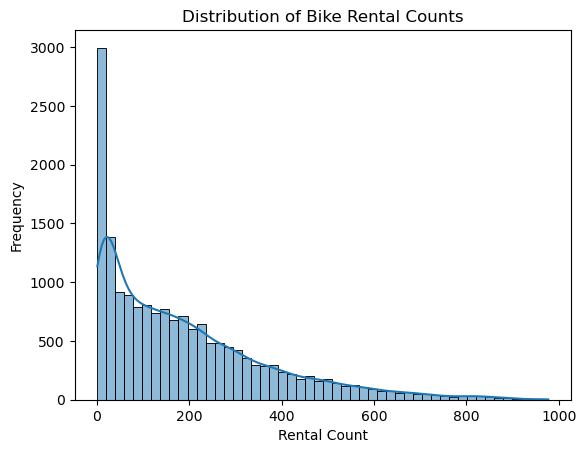

 Data after encoding: (17379, 59)
Features shape: (17379, 55)
Target shape: (17379,)
Train size: (13903, 55) Test size: (3476, 55)
MILESTONE 1 COMPLETED!!!!!!!!!!!!!!!!!!


In [2]:
# RideWise - Milestone 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = r"C:\Users\chait\OneDrive\Desktop\RideWise\hour.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

data = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
display(data.head())
# Step 3: Dataset Exploration

print("\n--- Dataset Info ---")
print(data.info())

print("\n--- Summary Statistics ---")
print(data.describe())

print("\n--- Missing Values ---")
print(data.isnull().sum())

# Distribution of target variable
sns.histplot(data['cnt'], bins=50, kde=True)
plt.title("Distribution of Bike Rental Counts")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()
# Step 4: Data Preprocessing & Feature Engineering

data['dteday'] = pd.to_datetime(data['dteday'], errors='coerce')
data['weekday'] = data['dteday'].dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
categorical_cols = [col for col in ['season','weathersit','mnth','hr','weekday'] if col in data.columns]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(" Data after encoding:", data.shape)
# Step 5: Feature Selection

drop_cols = [col for col in ['cnt','casual','registered','dteday'] if col in data.columns]
X = data.drop(drop_cols, axis=1)
y = data['cnt']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Step 6: Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

print("MILESTONE 1 COMPLETED!!!!!!!!!!!!!!!!!!")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


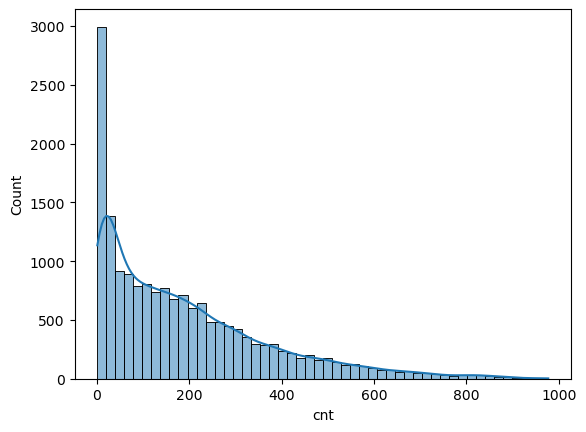

In [3]:
data = pd.read_csv(file_path)
print(data.head())
sns.histplot(data['cnt'], bins=50, kde=True)
plt.show()


In [5]:
data.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ------------------------------
# Load dataset (Milestone 1)
# ------------------------------

data = pd.read_csv(r"C:\Users\chait\OneDrive\Desktop\RideWise\hour.csv")


# ------------------------------
# Step 1: Convert 'dteday' to datetime
# ------------------------------
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract weekday (0=Monday, 6=Sunday)
data['weekday'] = data['dteday'].dt.weekday

# Create 'is_weekend' feature (1 if Saturday or Sunday, else 0)
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# ------------------------------
# Step 2: One-hot encode categorical features
# ------------------------------
categorical_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# ------------------------------
# Step 3: Separate features and target
# ------------------------------
X = data_encoded.drop(['cnt', 'casual', 'registered', 'instant', 'dteday'], axis=1)
y = data_encoded['cnt']

# ------------------------------
# Step 4: Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Optional: Display processed feature table
# ------------------------------
print("Processed features (X) preview:")
print(X.head())
print("\nFeature vector size:", X.shape)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Processed features (X) preview:
   yr  holiday  workingday  temp   atemp   hum  windspeed  is_weekend  \
0   0        0           0  0.24  0.2879  0.81        0.0           1   
1   0        0           0  0.22  0.2727  0.80        0.0           1   
2   0        0           0  0.22  0.2727  0.80        0.0           1   
3   0        0           0  0.24  0.2879  0.75        0.0           1   
4   0        0           0  0.24  0.2879  0.75        0.0           1   

   season_2  season_3  ...  hr_20  hr_21  hr_22  hr_23  weekday_1  weekday_2  \
0     False     False  ...  False  False  False  False      False      False   
1     False     False  ...  False  False  False  False      False      False   
2     False     False  ...  False  False  False  False      False      False   
3     False     False  ...  False  False  False  False      False      False   
4     False     False  ...  False  False  False  False      False      False   

   weekday_3  weekday_4  weekday_5  weekday_6  


In [4]:
# RideWise - Milestone 2

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Week 3: Preliminary Model Training
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Decision Tree 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Preliminary models trained.")

# Week 4: Predictions and Fine-tuning

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")
    return mae, rmse, r2

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")

rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("\n Fine-tuned Random Forest Results:")
evaluate(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")
print("MILESTONE 2 COMPLETED!!!!!!!!!!!!!!!!!!")

Preliminary models trained.

 Linear Regression Performance
MAE:  74.11
RMSE: 100.45
R²:   0.68

 Decision Tree Performance
MAE:  43.34
RMSE: 70.85
R²:   0.84

 Random Forest Performance
MAE:  32.76
RMSE: 51.70
R²:   0.92

 Fine-tuned Random Forest Results:

 Random Forest (Tuned) Performance
MAE:  45.69
RMSE: 66.61
R²:   0.86
MILESTONE 2 COMPLETED!!!!!!!!!!!!!!!!!!


In [6]:
# -------------------------------
# Milestone 3 - Advanced Models & Fine-Tuning
# -------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Function to evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# -------------------------------
# 1. Random Forest with GridSearchCV
# -------------------------------

param_grid = {
    'n_estimators': [200],
    'max_depth': [15, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\n Best parameters for Random Forest:", grid.best_params_)
evaluate(y_test, best_rf.predict(X_test), "Random Forest (GridSearchCV)")

# -------------------------------
# 2. Gradient Boosting
# -------------------------------
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

gb.fit(X_train, y_train)
evaluate(y_test, gb.predict(X_test), "Gradient Boosting")

# -------------------------------
# 3. XGBoost
# -------------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
evaluate(y_test, xgb.predict(X_test), "XGBoost")

print("MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!")


import joblib

# Save the best Random Forest (from GridSearchCV) for deployment
joblib.dump(best_rf, "ridewise_best_model.pkl")
print(" Best model saved as ridewise_best_model.pkl")




Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

 Random Forest (GridSearchCV) Performance
MAE: 39.89, RMSE: 58.11, R²: 0.89

 Gradient Boosting Performance
MAE: 34.45, RMSE: 51.51, R²: 0.92

 XGBoost Performance
MAE: 28.99, RMSE: 46.10, R²: 0.93
MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!
 Best model saved as ridewise_best_model.pkl


In [7]:
# -------------------------------
# Milestone 3 - Advanced Models & Full Pipeline
# -------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# -------------------------------
# 1. Train-Test Split
# -------------------------------
# Assume X, y from Milestone 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. Preprocessing Pipeline
# -------------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['uint8']).columns.tolist()  # one-hot encoded columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)  # already encoded
    ]
)

# -------------------------------
# 3. Full Pipeline with Random Forest
# -------------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ))
])

# -------------------------------
# 4. Train the Pipeline
# -------------------------------
rf_pipeline.fit(X_train, y_train)

# -------------------------------
# 5. Evaluate Function
# -------------------------------
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# Evaluate Random Forest pipeline
y_pred_rf = rf_pipeline.predict(X_test)
evaluate(y_test, y_pred_rf, "Random Forest Pipeline")

# -------------------------------
# 6. Optional: GridSearch for Random Forest (Advanced)
# -------------------------------
param_grid = {
    'regressor__n_estimators': [200, 300],
    'regressor__max_depth': [15, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_pipeline = grid.best_estimator_

print("\n Best parameters for pipeline:", grid.best_params_)

y_pred_best = best_pipeline.predict(X_test)
evaluate(y_test, y_pred_best, "Random Forest (Tuned Pipeline)")

# -------------------------------
# 7. Save the Full Pipeline
# -------------------------------
joblib.dump(best_pipeline, "ridewise_best_model.pkl")
print(" Best pipeline saved as ridewise_best_model.pkl")



 Random Forest Pipeline Performance
MAE: 108.10, RMSE: 151.47, R²: 0.28
Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Best parameters for pipeline: {'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300}

 Random Forest (Tuned Pipeline) Performance
MAE: 103.62, RMSE: 141.73, R²: 0.37
 Best pipeline saved as ridewise_best_model.pkl


In [ ]:
# -------------------------------
# Milestone 3 - Advanced Models & Fine-Tuning
# -------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Function to evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# -------------------------------
# 1. Random Forest with GridSearchCV
# -------------------------------

param_grid = {
    'n_estimators': [200],
    'max_depth': [15, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\n Best parameters for Random Forest:", grid.best_params_)
evaluate(y_test, best_rf.predict(X_test), "Random Forest (GridSearchCV)")

# -------------------------------
# 2. Gradient Boosting
# -------------------------------
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

gb.fit(X_train, y_train)
evaluate(y_test, gb.predict(X_test), "Gradient Boosting")

# -------------------------------
# 3. XGBoost
# -------------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
evaluate(y_test, xgb.predict(X_test), "XGBoost")

print("MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!")




from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

categorical_features = ['hr', 'weekday', 'mnth', 'season', 'weathersit']
numeric_features = ['temperature', 'humidity', 'windspeed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_model)])


joblib.dump(rf_pipeline, "ridewise_best_model.pkl")
print("✅ Full pipeline saved as ridewise_best_model.pkl")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [4]:
# After training and testing your models
del X_train, X_test, y_train, y_test, gb, xgb, best_rf
import gc
gc.collect()


5601

In [6]:
import gc
gc.collect()



564

In [10]:
import pandas as pd

# Assuming you already loaded dataset as 'data'
print(data.head())


   instant     dteday  yr  holiday  workingday  temp   atemp   hum  windspeed  \
0        1 2011-01-01   0        0           0  0.24  0.2879  0.81        0.0   
1        2 2011-01-01   0        0           0  0.22  0.2727  0.80        0.0   
2        3 2011-01-01   0        0           0  0.22  0.2727  0.80        0.0   
3        4 2011-01-01   0        0           0  0.24  0.2879  0.75        0.0   
4        5 2011-01-01   0        0           0  0.24  0.2879  0.75        0.0   

   casual  ...  hr_21  hr_22  hr_23  weekday_1  weekday_2  weekday_3  \
0       3  ...  False  False  False      False      False      False   
1       8  ...  False  False  False      False      False      False   
2       5  ...  False  False  False      False      False      False   
3       3  ...  False  False  False      False      False      False   
4       0  ...  False  False  False      False      False      False   

   weekday_4  weekday_5  weekday_6  weekday  
0      False       True      False

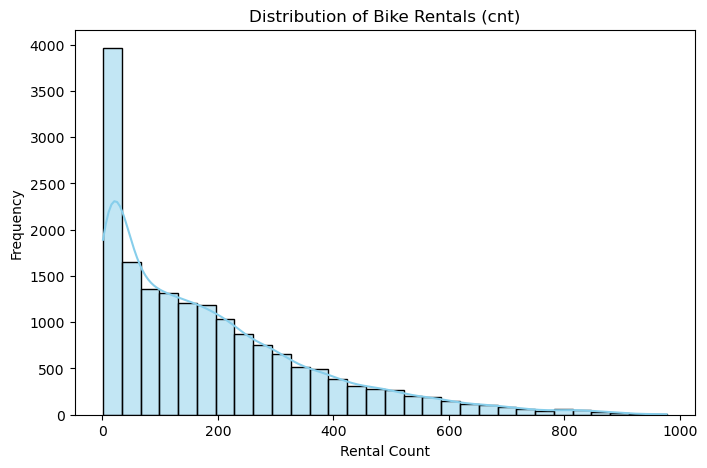

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data['cnt'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Bike Rentals (cnt)")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()


In [5]:
import streamlit as st
import joblib
import pandas as pd
from datetime import datetime
import os

# --- 1. SETTINGS AND COLORS (Simple & Clean) ---
BLUE_ACCENT = "#1E90FF"  # Dodger Blue (Clean, bright blue)
DARK_BG = "#121212"     # Very dark background
RESULT_COLOR = "#00FF7F" # Spring Green (Bright, positive result color)
FONT_FAMILY = "Arial, sans-serif"

# NOTE: The reliable bike image link is retained.
BACKGROUND_URL = "https://images.unsplash.com/photo-1558981403-c5f9899a280b?q=80&w=2670&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
MODEL_FILE = "ridewise_best_model.pkl"

# --- MAPPING DICTIONARIES (kept same values) ---
SEASON_DICT = {"Winter": 1, "Spring": 2, "Summer": 3, "Fall": 4}
WEATHER_DICT = {"Clear / Sunny": 1, "Mist / Cloudy": 2, "Light Rain / Snow": 3, "Heavy Rain / Ice": 4}
EVENT_DICT = {"No": 0, "Yes": 1}


# ----------------------------------------
# 2. PAGE CONFIGURATION
# ----------------------------------------
st.set_page_config(
    page_title="Bike Demand Predictor",
    page_icon="🚴",
    layout="wide",
    initial_sidebar_state="expanded"
)

# ----------------------------------------
# 3. CUSTOM CSS (Simple & Professional Dark Mode)
# ----------------------------------------
simple_css = f"""
<style>
/* 1. Global Background and Font */
.stApp {{
    background-image: url("{BACKGROUND_URL}");
    background-size: cover;
    background-attachment: fixed;
    background-position: center;
}}
.stApp::before {{
    content: "";
    position: absolute;
    top: 0;
    left: 0;
    width: 100%;
    height: 100%;
    background-color: rgba(0, 0, 0, 0.9); /* Dark overlay */
    z-index: -1;
}}
* {{
    font-family: {FONT_FAMILY} !important;
}}

/* 2. Headers and General Text */
h1, h2, h3, h4, label, .stMarkdown {{
    color: #FFFFFF !important; /* White text for clarity */
}}
.stMarkdown h3 {{
    color: {BLUE_ACCENT} !important; /* Blue for section titles */
}}

/* 3. Sidebar */
[data-testid="stSidebar"] {{
    background-color: {DARK_BG};
    border-right: 3px solid {BLUE_ACCENT};
}}
[data-testid="stSidebar"] .stMarkdown h1 {{
    color: {BLUE_ACCENT} !important;
    font-size: 2.2rem;
    padding-top: 20px;
    padding-bottom: 5px;
}}
[data-testid="stSidebar"] .stMarkdown p {{
    color: #999999;
    font-size: 0.9rem;
}}

/* 4. Input Containers (Clean Cards) */
div[data-testid="stContainer"] {{
    background-color: rgba(255, 255, 255, 0.05); /* Very light, transparent card */
    border-radius: 10px;
    padding: 25px;
    margin-bottom: 20px;
    border: 1px solid rgba(255, 255, 255, 0.1); /* Subtle white border */
}}
.stTextInput input, .stNumberInput input, .stDateInput input, .stSelectbox div[data-testid="stSelectboxContainer"] div[data-testid="stSelectboxValue"] {{
    color: #FFFFFF !important;
    background: rgba(0, 0, 0, 0.2) !important;
    border-radius: 5px;
}}

/* 5. Button (High Contrast) */
.stButton>button {{
    display: block;
    width: 100%;
    padding: 15px;
    background-color: {BLUE_ACCENT};
    color: white;
    border-radius: 8px;
    font-size: 1.2rem;
    font-weight: bold;
    transition: all 0.2s ease;
    border: 2px solid {BLUE_ACCENT};
}}
.stButton>button:hover {{
    background-color: {DARK_BG};
    color: {BLUE_ACCENT};
    border: 2px solid {BLUE_ACCENT};
}}

/* 6. Result Box (Highlight) */
.result-box {{
    background-color: rgba(0, 255, 127, 0.1); /* Light green transparent background */
    border-radius: 12px;
    padding: 30px;
    border: 3px solid {RESULT_COLOR};
    text-align: center;
}}
.result-box h3 {{
    color: #FFFFFF !important;
    font-size: 1.5rem !important;
}}
.result-value {{
    color: {RESULT_COLOR};
    font-size: 4.0rem; /* Big number */
    font-weight: 900;
    display: block;
    line-height: 1.1;
}}

/* 7. Info Box (Feedback) */
.info-box {{
    background: rgba(255, 255, 255, 0.08);
    border-left: 5px solid {RESULT_COLOR};
    padding: 20px;
    margin-top: 15px;
    border-radius: 8px;
    color: #F0F0F0;
    line-height: 1.6;
}}
.info-box strong {{
    color: {BLUE_ACCENT};
    font-size: 1.05rem;
    display: block;
    padding-bottom: 5px;
}}
</style>
"""
st.markdown(simple_css, unsafe_allow_html=True)

# ----------------------------------------
# 4. SIDEBAR (Title)
# ----------------------------------------
with st.sidebar:
    st.markdown(f"<h1>RideWise</h1>", unsafe_allow_html=True)
    st.markdown(f"<p>Bike Demand Predictor</p>", unsafe_allow_html=True)
    st.markdown("---")
    st.markdown("### Status")
    if os.path.exists(MODEL_FILE):
        st.success(f"Prediction Model: **READY**")
    else:
        st.error(f"Prediction Model: **MISSING**")
    
    st.markdown("---")
    st.markdown("This tool predicts how many bikes people are likely to rent based on weather and time, helping optimize availability and improve service efficiency.")

# ----------------------------------------
# 5. MAIN CONTENT (Header)
# ----------------------------------------
st.markdown('<h1>Bike Rental Forecast Based on Weather and Urban Events</h1>', unsafe_allow_html=True)
st.markdown('<h3>Enter the details below to see the expected bike demands.</h3>', unsafe_allow_html=True)

# ----------------------------------------
# 6. MODEL LOADING
# ----------------------------------------
try:
    if not os.path.exists(MODEL_FILE):
        raise FileNotFoundError()
        
    @st.cache_resource
    def load_model(file_path):
        return joblib.load(file_path)

    model = load_model(MODEL_FILE)
    
except FileNotFoundError:
    st.stop() # Stops execution if model is not found, relying on sidebar error.
except Exception as e:
    st.error(f"❌ Error loading the model file. Please check the file.")
    st.stop()


# ----------------------------------------
# 7. USER INPUTS
# ----------------------------------------

st.markdown("### When and Where")
with st.container(border=False):
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        date_input = st.date_input("📅 Choose Date", datetime.today(), 
                                   help="The day you want to predict.")
        
    with col2:
        hour = st.slider("🕒 Choose Hour (0-23)", 0, 23, 17, 
                         help="The specific hour of the day (e.g., 17 is 5 PM).")
    
    with col3:
        season = st.selectbox("🌦️ What Season is it?", list(SEASON_DICT.keys()), key='season_in',
                              help="Season helps predict general demand level.")
        season_value = SEASON_DICT[season]
        
    with col4:
        weathersit = st.selectbox("⛈️ How is the Weather?", list(WEATHER_DICT.keys()), key='weather_in',
                                  help="Weather condition is the biggest factor.")
        weathersit_value = WEATHER_DICT[weathersit]

st.markdown("### More Details")
with st.container(border=False):
    col_a, col_b, col_c = st.columns(3)
    
    with col_a:
        temp = st.number_input("🌡️ Temperature (0=Cold, 1=Hot)", min_value=0.0, max_value=1.0, step=0.01, value=0.6, key='temp_in',
                               help="Input the temperature, scaled from 0 (very cold) to 1 (very hot).")
        
    with col_b:
        humidity = st.number_input("💧 Humidity (0=Dry, 1=Wet)", min_value=0.0, max_value=1.0, step=0.01, value=0.45, key='hum_in',
                                   help="Input the air humidity, scaled from 0 to 1.")
    
    with col_c:
        event = st.selectbox("🎉 Is there a Urban Event?", list(EVENT_DICT.keys()), key='event_in',
                             help="Select 'Yes' if there is a major event today.", index=0)
        event_value = EVENT_DICT[event]

st.markdown("---")

# ----------------------------------------
# 8. PREDICTION AND RESULT DISPLAY
# ----------------------------------------
if st.button(" Check Demand Now", key="predict"):
    
    # 1. Prepare Input Data
    input_data = pd.DataFrame([{
        'season': season_value,
        'weathersit': weathersit_value,
        'mnth': date_input.month,
        'hr': hour,
        'temp': temp,
        'hum': humidity,
        'event': event_value
    }])

    # 2. OHE and Feature Reindexing (Model Compatibility)
    input_data = pd.get_dummies(input_data, columns=['hr', 'mnth', 'season', 'weathersit', 'event'])
    
    try:
        input_data = input_data.reindex(columns=model.feature_names_in_, fill_value=0)
    except AttributeError:
        st.error("❌ Model feature error. Cannot predict.")
        st.stop()

    # 3. Predict and Format Result
    prediction = model.predict(input_data)
    predicted_rentals = int(max(0, prediction[0]))

    
    col_result, col_insights = st.columns([1, 2])

    with col_result:
        st.markdown(f"""
            <div class="result-box">
                <p style="color: white; margin: 0; font-size: 1.1rem; font-weight: 500;">BIKES NEEDED</p>
                <span class="result-value">{predicted_rentals}</span>
                <p style="color: {BLUE_ACCENT}; margin: 0; font-size: 1.1rem;">Total for this hour</p>
            </div>
        """, unsafe_allow_html=True)
    
    # ----------------------------------------
    # Insights (Simple Text)
    # ----------------------------------------
    with col_insights:
        suggestions = []

        if predicted_rentals < 20:
            suggestions.append("⚠️ **Low Demand:** You won't need many bikes. **Action:** Focus on cleaning or repairs.")
            if weathersit_value >= 3:
                suggestions.append("   - Main Reason: **Bad weather** (rain/snow).")
            if temp < 0.3 or temp > 0.8:
                suggestions.append("   - Also: **Extreme temperature** (too hot or too cold).")
        elif predicted_rentals > 150:
            suggestions.append("🔥 **High Demand!** You need all your bikes ready. **Action:** Move bikes to busy spots fast.")
            if event_value == 1:
                suggestions.append("   - Main Reason: **A big event** is happening.")
            if weathersit_value == 1 and 7 <= hour <= 19:
                suggestions.append("   - Also: **Perfect weather** during peak hours.")
        else:
            suggestions.append("✅ **Normal Demand:** Keep things running as usual. **Action:** Check bike supply often.")


        st.markdown(f"""
            <div class="info-box">
                <strong>SYSTEM ADVICE:</strong><br>
                {"<br>".join(suggestions)}
            </div>
        """, unsafe_allow_html=True)

    # ----------------------------------------
    # Input Summary
    # ----------------------------------------
    st.markdown(f"""
        <div class="info-box" style="border-left: 5px solid {BLUE_ACCENT};">
            <strong>YOUR INPUTS:</strong><br>
            <span style="color: #999999;">TIME:</span> {date_input.strftime('%Y-%m-%d')} @ **{hour}:00**<br>
            <span style="color: #999999;">WEATHER:</span> **{weathersit}** | Temp: **{temp:.2f}** | Event: **{event}**
        </div>
    """, unsafe_allow_html=True)

2025-10-17 09:32:18.175 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 09:32:18.179 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 09:32:19.487 
  command:

    streamlit run D:\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-17 09:32:19.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 09:32:19.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 09:32:19.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 09:32:19.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare m